# Part 1: Introduction and brief overview

This workshop is conducted by ***Milena Vujović$^{1}$***,  ***Frederikke Isa Marin$^{1}$*** and ***Anna-lisa Schaap-Johansen$^{1}$***. 

You have already gone through some data wrangling and visualisation, as well as looking up documentation. Therefore, today's exercise will be more independent and you are expected to look at yesterdays notebook for reminding yourself how to do certain steps if you don't remember e.g. loading the data. 


Today we will go over unsupervised learning algortihms. Specifically, agglomerative hierarchical and k-means clustering.

At the end of this day you should be able to:
1. analyse your data with clustering techniques 
2. confidently plot the results of your analysis
3. assess and compare different clustering methods.


We will go over two datasets in order to fullfil our goals. 

The first dataset stored in "aa_frequency_location.tsv" has information on the N-terminus of proteins. The dataset cosists of two classes Secretory and Non-secretory proteins. The input consists of 20 features, which are the amino acid frequencies of the first 30 amino acids of a protein (N-terminal part). Our main question is whether or not we can see any differnces in amino acid usage between secretory and non secretory proteins and how can we use this to classify the proteins. 

The second dataset is stored in "tissue_expression.tsv". It contains gene expression levels for 189 samples and 7 tissues. 

(source: http://genomicsclass.github.io/book/pages/pca_svd.html)


***
You can contact us at<br>
Milena Vujovic: milvu@dtu.dk (twitter: *@sciencisto* ) <br>
Frederikke Isa Marin: frisa@dtu.dk (twitter: *@fimarin42) <br> 
Anna-Lisa Schaap-Johansen: alsj@dtu.dk (twitter: *@SchaapJohansen) <br>
and also for the duration of this course on wechat :)

$^{1}$ Bioinformatics section, DTU Health Technology, Technical University of Denmark, Greater Copenhagen area, Denmark<br>


In [1]:
# Load packages
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 


In [2]:
plt.rcParams['figure.figsize'] = [10, 10]

In [3]:
## Symbolic link to the data: 
%cd
%cd ml_data
!ln -s /exercises/ml_intro/ml_data/aa_frequency_location.tsv ./aa_frequency_location.tsv # command to make symbolic link
!ln -s /exercises/ml_intro/ml_data/aa_frequency_location_incomplete.tsv ./aa_frequency_location_incomplete.tsv # command to make symbolic link
!ln -s /exercises/ml_intro/ml_data/tissue_expression.tsv ./tissue_expression.tsv # command to make symbolic link
!pwd
!ls

/home/jupyter-milena
/home/jupyter-milena/ml_data
ln: failed to create symbolic link './aa_frequency_location.tsv': File exists
ln: failed to create symbolic link './aa_frequency_location_incomplete.tsv': File exists
ln: failed to create symbolic link './tissue_expression.tsv': File exists
/home/jupyter-milena/ml_data
UMAP.png		   aa_frequency_location_incomplete.tsv
aa_frequency_location.tsv  tissue_expression.tsv


# Load the data (1 point)

Load the data into a pandas dataframe called aa_freq_loc_df

In [4]:
aa_freq_loc_df = pd.read_csv("aa_frequency_location.tsv", sep = "\t")
aa_freq_loc_df

,location,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
0,Non-secretory,0.133333,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.033333,0.033333,...,0.066667,0.033333,0.033333,0.000000,0.066667,0.300000,0.066667,0.100000,0.0,0.000000
1,Non-secretory,0.233333,0.033333,0.000000,0.000000,0.033333,0.066667,0.000000,0.100000,0.033333,...,0.033333,0.000000,0.066667,0.000000,0.066667,0.266667,0.000000,0.000000,0.0,0.000000
2,Non-secretory,0.166667,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,...,0.033333,0.033333,0.033333,0.033333,0.100000,0.266667,0.000000,0.166667,0.0,0.000000
3,Non-secretory,0.266667,0.033333,0.000000,0.000000,0.066667,0.000000,0.000000,0.033333,0.066667,...,0.033333,0.033333,0.033333,0.000000,0.066667,0.200000,0.000000,0.133333,0.0,0.000000
4,Non-secretory,0.200000,0.066667,0.000000,0.000000,0.000000,0.066667,0.000000,0.066667,0.033333,...,0.033333,0.033333,0.033333,0.033333,0.033333,0.233333,0.033333,0.033333,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,Secretory,0.033333,0.133333,0.033333,0.000000,0.133333,0.000000,0.033333,0.000000,0.100000,...,0.066667,0.000000,0.033333,0.000000,0.066667,0.133333,0.000000,0.033333,0.0,0.033333
3054,Secretory,0.100000,0.033333,0.000000,0.033333,0.100000,0.133333,0.000000,0.033333,0.000000,...,0.033333,0.000000,0.000000,0.066667,0.066667,0.166667,0.000000,0.033333,0.0,0.033333
3055,Secretory,0.200000,0.000000,0.033333,0.033333,0.100000,0.000000,0.000000,0.033333,0.033333,...,0.100000,0.000000,0.066667,0.100000,0.000000,0.033333,0.100000,0.000000,0.0,0.066667
3056,Secretory,0.000000,0.100000,0.033333,0.000000,0.100000,0.000000,0.000000,0.066667,0.033333,...,0.066667,0.033333,0.033333,0.033333,0.000000,0.100000,0.066667,0.066667,0.0,0.000000


# Hiearchical clustering 

Now we will perform agglomerative hierarchical clustering on the same data. 

## Q1 what are the two types of hiearchical clustering? (1 point)

**Answer** Agglomerative and divisive

Now lets try to perform hierarchical clustering on the same data. The first step is to calculate the linkage. Linkage is the measure of the dissimilarity between two sets that determines how two sets are merged. There are different ways of calcuting it. 

## Q2 What are the 4 most common ways of calculating linkage in agglomerative hierarchical clustering? (1 point)

**Answer**: Single, average, complete and ward linkage

As you might remember from yesterday, our dataset has 3058 data points. This might be difficult to visualise at once with a dendogram. Therefore we will take a random sample of 50 proteins for the purposes of todays exercise. 

In [5]:
np.random.seed(42)
aa_freq_loc_df_subsample = aa_freq_loc_df.loc[np.random.choice(aa_freq_loc_df.index, 50, replace=False)]
aa_freq_loc_df_subsample

,location,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
1764,Secretory,0.066667,0.000000,0.033333,0.000000,0.033333,0.066667,0.000000,0.033333,0.000000,...,0.100000,0.000000,0.033333,0.000000,0.100000,0.133333,0.033333,0.033333,0.033333,0.033333
203,Non-secretory,0.233333,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,...,0.066667,0.000000,0.066667,0.033333,0.033333,0.200000,0.100000,0.133333,0.000000,0.000000
1356,Secretory,0.066667,0.100000,0.033333,0.033333,0.100000,0.033333,0.000000,0.033333,0.033333,...,0.033333,0.000000,0.000000,0.033333,0.000000,0.133333,0.066667,0.166667,0.000000,0.033333
1451,Secretory,0.033333,0.066667,0.000000,0.033333,0.000000,0.100000,0.033333,0.066667,0.033333,...,0.066667,0.000000,0.033333,0.033333,0.033333,0.100000,0.033333,0.033333,0.033333,0.033333
1577,Secretory,0.066667,0.100000,0.000000,0.000000,0.033333,0.066667,0.000000,0.000000,0.066667,...,0.033333,0.000000,0.000000,0.066667,0.000000,0.100000,0.066667,0.166667,0.000000,0.100000
102,Non-secretory,0.266667,0.000000,0.000000,0.000000,0.033333,0.066667,0.000000,0.000000,0.100000,...,0.100000,0.000000,0.000000,0.033333,0.066667,0.166667,0.033333,0.133333,0.000000,0.000000
2836,Secretory,0.033333,0.066667,0.066667,0.066667,0.100000,0.033333,0.033333,0.033333,0.000000,...,0.066667,0.000000,0.133333,0.000000,0.033333,0.066667,0.033333,0.133333,0.033333,0.000000
1818,Secretory,0.100000,0.000000,0.000000,0.000000,0.200000,0.033333,0.000000,0.066667,0.100000,...,0.066667,0.033333,0.000000,0.000000,0.033333,0.033333,0.133333,0.033333,0.000000,0.000000
485,Non-secretory,0.066667,0.000000,0.000000,0.100000,0.066667,0.100000,0.000000,0.033333,0.066667,...,0.066667,0.000000,0.033333,0.033333,0.100000,0.033333,0.033333,0.066667,0.033333,0.066667
1436,Secretory,0.166667,0.033333,0.000000,0.033333,0.000000,0.100000,0.000000,0.000000,0.000000,...,0.033333,0.000000,0.100000,0.033333,0.066667,0.100000,0.033333,0.066667,0.000000,0.000000


## Q3 Reset the index of the dataframe. What is the shape of the dataframe? (1 point)

In [6]:
aa_freq_loc_df_subsample = aa_freq_loc_df_subsample.reset_index(drop = True)
aa_freq_loc_df_subsample

,location,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
0,Secretory,0.066667,0.000000,0.033333,0.000000,0.033333,0.066667,0.000000,0.033333,0.000000,...,0.100000,0.000000,0.033333,0.000000,0.100000,0.133333,0.033333,0.033333,0.033333,0.033333
1,Non-secretory,0.233333,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,...,0.066667,0.000000,0.066667,0.033333,0.033333,0.200000,0.100000,0.133333,0.000000,0.000000
2,Secretory,0.066667,0.100000,0.033333,0.033333,0.100000,0.033333,0.000000,0.033333,0.033333,...,0.033333,0.000000,0.000000,0.033333,0.000000,0.133333,0.066667,0.166667,0.000000,0.033333
3,Secretory,0.033333,0.066667,0.000000,0.033333,0.000000,0.100000,0.033333,0.066667,0.033333,...,0.066667,0.000000,0.033333,0.033333,0.033333,0.100000,0.033333,0.033333,0.033333,0.033333
4,Secretory,0.066667,0.100000,0.000000,0.000000,0.033333,0.066667,0.000000,0.000000,0.066667,...,0.033333,0.000000,0.000000,0.066667,0.000000,0.100000,0.066667,0.166667,0.000000,0.100000
5,Non-secretory,0.266667,0.000000,0.000000,0.000000,0.033333,0.066667,0.000000,0.000000,0.100000,...,0.100000,0.000000,0.000000,0.033333,0.066667,0.166667,0.033333,0.133333,0.000000,0.000000
6,Secretory,0.033333,0.066667,0.066667,0.066667,0.100000,0.033333,0.033333,0.033333,0.000000,...,0.066667,0.000000,0.133333,0.000000,0.033333,0.066667,0.033333,0.133333,0.033333,0.000000
7,Secretory,0.100000,0.000000,0.000000,0.000000,0.200000,0.033333,0.000000,0.066667,0.100000,...,0.066667,0.033333,0.000000,0.000000,0.033333,0.033333,0.133333,0.033333,0.000000,0.000000
8,Non-secretory,0.066667,0.000000,0.000000,0.100000,0.066667,0.100000,0.000000,0.033333,0.066667,...,0.066667,0.000000,0.033333,0.033333,0.100000,0.033333,0.033333,0.066667,0.033333,0.066667
9,Secretory,0.166667,0.033333,0.000000,0.033333,0.000000,0.100000,0.000000,0.000000,0.000000,...,0.033333,0.000000,0.100000,0.033333,0.066667,0.100000,0.033333,0.066667,0.000000,0.000000


In [7]:
aa_freq_loc_df_subsample.shape

(50, 21)

## Q4 Split the dataset into observables and categorical variables (3 point)

Extract the categorical variables as a single column from the aa_freq_loc_df_subsample and convert them to a list. 

Name the observables: frequencies
Name the categorical variables: labels_list

In [8]:
observables = list(aa_freq_loc_df_subsample)[1:]
#Separating out the features
frequencies = aa_freq_loc_df_subsample.loc[:, observables].values
#Separating out the target
labels_list = aa_freq_loc_df_subsample['location']
labels_list = list(labels_list)

## Q5 Calculate the average linkage of the dataset using the linkage function and store it in variable Z_AL (1 point)


*Hint* The first argument of this function is the data, the second is the method. Use the linkage? in jupyter to see the documentation on the function




In [9]:
Z_AL = linkage(frequencies, 'average')

## Q6 Plot the dendogram (2 point)

Check which distance was used by default in the linkage (use the linkage?) and name the x axis accordingly. Change the title and axis of the plot. 

Using the code bellow as inspiration plot the dendogram of the clustering result(linkage) and add labels to the dendogram.

`plt.figure()
plt.title('Title') 
plt.xlabel('Distance')
plt.ylabel('Categorical variable')
dendrogram(linkage_result,labels=categorical_variable_list, color_threshold=50, orientation='right', leaf_font_size=8.)
plt.show()`



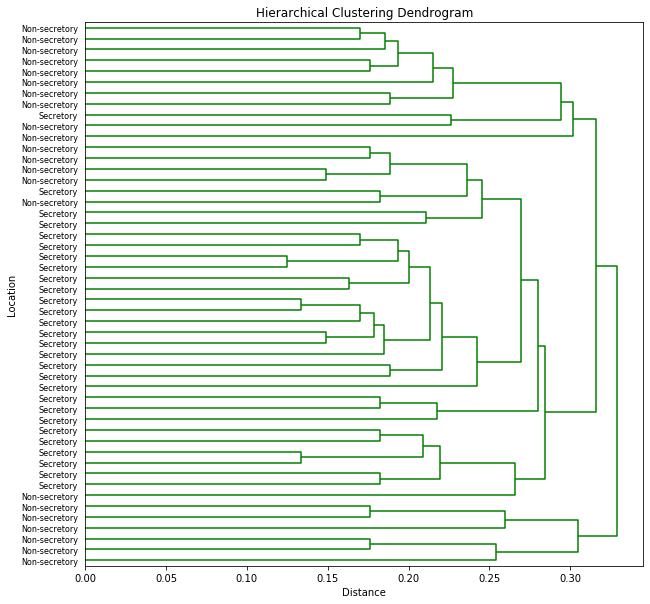

In [10]:
plt.figure()
plt.title('Hierarchical Clustering Dendrogram') 
plt.xlabel('Distance')
plt.ylabel('Location')
dendrogram(Z_AL, labels=labels_list, color_threshold=50, orientation='right', leaf_font_size=8.)
plt.show()

## Q7 Create a complete linkage dendogram of the subset data (1 point)

Colour the labels and name the linkage Z_CL 

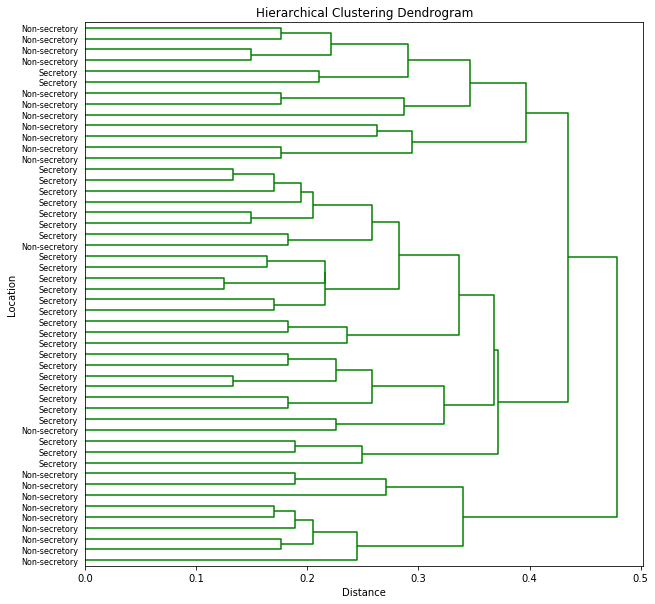

In [11]:
Z_CL= linkage(frequencies, 'complete')

plt.figure()
plt.title('Hierarchical Clustering Dendrogram') 
plt.xlabel('Distance')
plt.ylabel('Location')
dendrogram(Z_CL,labels=labels_list, color_threshold=50, orientation='right', leaf_font_size=8.)
    
plt.show()

## Q8 Create a single linkage dendogram of the subset data (1 point)

Colour the labels and name the linkage Z_SL 

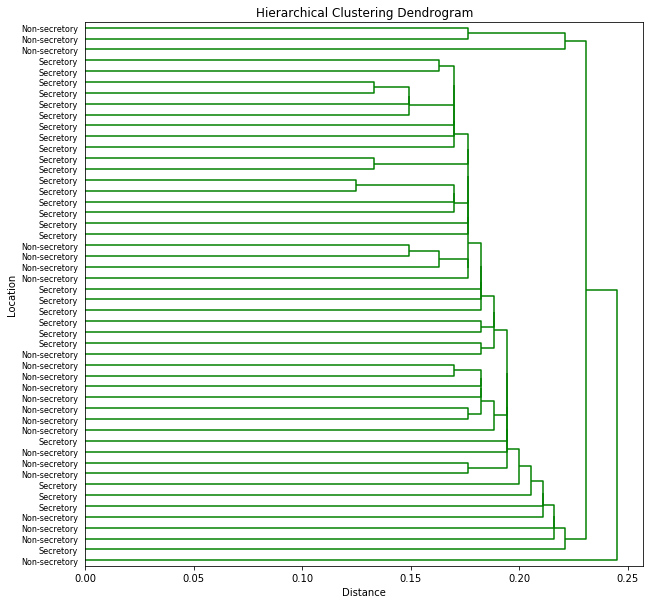

In [12]:
Z_SL = linkage(frequencies, 'single')

plt.figure()
plt.title('Hierarchical Clustering Dendrogram') 
plt.xlabel('Distance')
plt.ylabel('Location')
dendrogram(Z_SL,labels=labels_list, color_threshold=50, orientation='right', leaf_font_size=8.)
    
plt.show()

## Q9 Create a ward linkage dendogram of the subset data (1 point)

Colour the labels and name the linkage Z_WL 

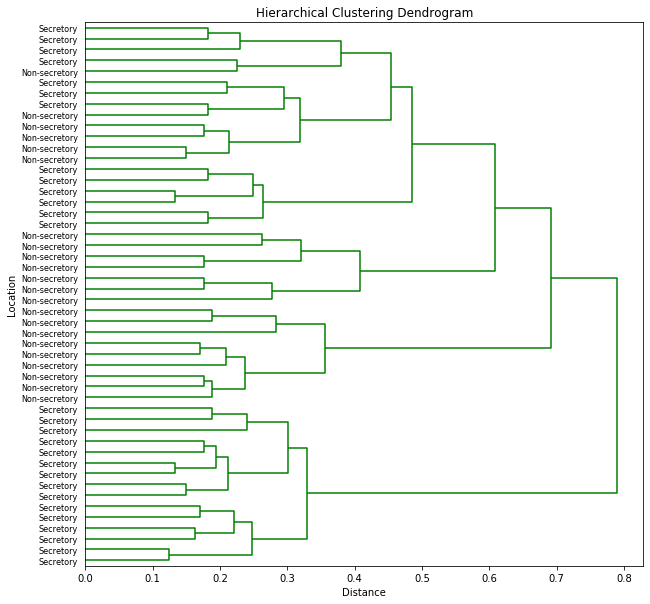

In [13]:
Z_WL= linkage(frequencies, 'ward')

plt.figure()
plt.title('Hierarchical Clustering Dendrogram') 
plt.xlabel('Distance')
plt.ylabel('Location')
dendrogram(Z_WL,labels=labels_list, color_threshold=50, orientation='right', leaf_font_size=8.)

    
plt.show()

Each linakge method has pros and cons: 

**Complete linkage**
- Maximum dissimilarity between points in two sets used to determine which two sets should be merged.
- Often gives comparable cluster sizes.
- Less sensitive to outliers.
- Works better with spherical distributions.

**Single linkage**
- Maximum dissimilarity between points in two sets used to determine which two sets should be merged.
- Often gives comparable cluster sizes.
- Less sensitive to outliers.
- Works better with spherical distributions.

**Average and Ward linkage**

- Average dissimilarity between points in two sets used to determine which two sets should be merged. 
- A compromise between single and complete linkage.
- Less sensitive to outliers.
- Works better with spherical distributions.

It might be difficult to visualise and understand why the different linkage clusteing behave the way they do without seeing individual values of amino acid frequency. We will us a heatmap to show frequency values along with the dendogram. 

## Q10 Create a dendogram with heatmap using the code bellow as inspiration. (3 points)

`#add coloured labels to the dendogram in the correct order!
colour_map = dict(zip(categorical_variable.unique(), "rbg"))
row_colours = categorical_variable.map(colour_map)

#create heatmap
g = sns.clustermap(df_subsample, row_colors = row_colours, z_score = 1, , col_cluster=False )
#colour labels 
for tick_label in g.ax_heatmap.axes.get_yticklabels():
    tick_text = tick_label.get_text()
    category_name = categorical_variable.loc[int(tick_text)]
    tick_label.set_color(colour_map[category_name])
    
for label in categorical_variable.unique():
    g.ax_col_dendrogram.bar(0, 0, color=colour_map[label],
                            label=label, linewidth=0)
    
g.ax_col_dendrogram.legend(loc="center", ncol=5)`

In [20]:
#we need to split the data into observbles and categorical data and save in a pandas dataframe
location = aa_freq_loc_df_subsample["location"]
aa_freq_loc_df_subsample = aa_freq_loc_df_subsample.drop("location", axis = 1)

KeyError: 'location'

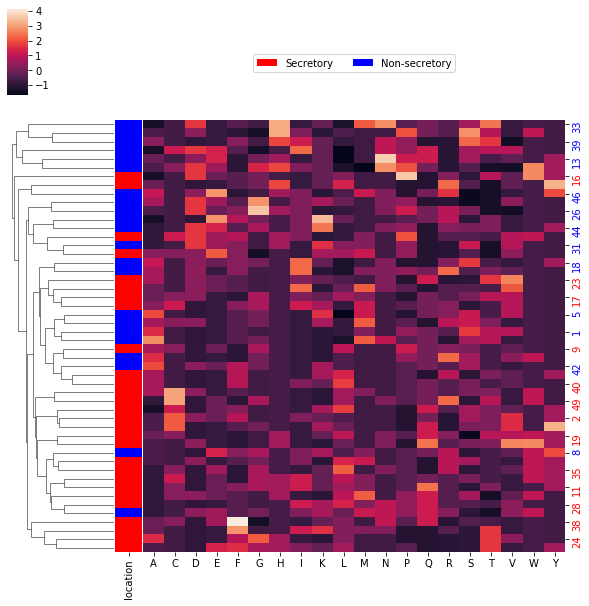

In [22]:
#add coloured labels to the dendogram in the correct order!
colour_map = dict(zip(location.unique(), "rbg"))
row_colours = location.map(colour_map)

#create heatmap
g = sns.clustermap(aa_freq_loc_df_subsample, row_colors = row_colours, z_score = 1, col_cluster=False )

for tick_label in g.ax_heatmap.axes.get_yticklabels():
    tick_text = tick_label.get_text()
    location_name = location.loc[int(tick_text)]
    tick_label.set_color(colour_map[location_name])

for label in location.unique():
    g.ax_col_dendrogram.bar(0, 0, color=colour_map[label],
                            label=label, linewidth=0)
    
g.ax_col_dendrogram.legend(loc="center", ncol=5)

## Q11 Look at the documentation and find which linkage was used by default in creating the dendogram (1 point)

**Answer** Average

## Q12 We use the argument argument z_score = 1 in the sns.clustermap function. Look at the documentation and explain what this argument does (do not copy from documentation - use your own words) (2 points)


**Answer** Scales the columns by the mean and standard deiation of the column. 

## Q 13 Which linkage method do you think performed worst? Can you try to explain why that might be? (2 points )

**Answer** Single linkage. Dazzle me with the logic

# K-means clustering

The last type of clustering that we are going to try is K-means. This time we will use the whole dataset again. 

## Q 14 split the dataset into observables and variables like in Q4, only this time using the whole dataset - aa_freq_loc_df (1 point) 

In [23]:
observables = list(aa_freq_loc_df)[1:]
#Separating out the features
frequencies = aa_freq_loc_df.loc[:, observables].values
#Separating out the target
labels_list = aa_freq_loc_df['location']
labels_list = list(labels_list)

Run it with the following function, where n is the number of clusters that we decide beforehand. In this case lets start with 2, because we know that there are 2 different classes.

In [24]:
n=2
kmeans = KMeans(n_clusters=n) 
kmeans.fit(frequencies) 
kmeans_labels = kmeans.labels_

## Q15 Perform PCA on the frequency data as we did before (1 point)

Steps: 

1. Scale the data 
2. Perform PCA on scaled data, set number of components 12. Save output in finalDF 



In [25]:
#Scale the data 

frequencies_scaled = StandardScaler().fit_transform(frequencies)

In [26]:
#perform PCA

pca_scaled = decomposition.PCA(n_components=12)
principalComponents_scaled = pca_scaled.fit_transform(frequencies_scaled)

principalDf_scaled = pd.DataFrame(data = principalComponents_scaled)
finalDf_scaled = pd.concat([principalDf_scaled, aa_freq_loc_df[["location"]]], axis = 1)


## Q 16 Plot the PCA, but using the labels produced with K-means (kmeans_labels). (3 points)

Use the custom made function from bellow: 

In [27]:
def plot_kmeans_on_pca(x,y,labels,xlabel,ylabel):
#Code to color each sample based on the frequency
    unique_labels = np.unique(labels)
    hot = plt.get_cmap('Set2')
    cNorm  = colors.Normalize(vmin=0, vmax=len(unique_labels))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)
#Set figure size
    plt.figure(figsize=(10,10))
#Plot samples for each different label
    for i in range(len(unique_labels)):
        indx = labels == unique_labels[i]
        plt.scatter(x[indx], y[indx], s=30, color=scalarMap.to_rgba(i), label=unique_labels[i], alpha = 0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title('K-means on PCA layout')
    plt.legend()
    plt.show()

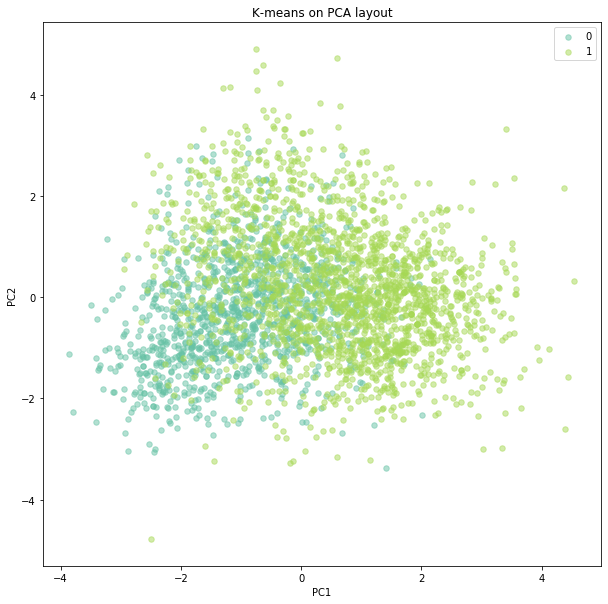

In [28]:
plot_kmeans_on_pca(finalDf_scaled[0], finalDf_scaled[1], kmeans_labels, "PC1", "PC2")

### Q17 Compare the labels with the K-means predicted labels. Are they similar? (2 points)
*Hint* compare to PCA plot on data from visualisation exercise

### Q18 Re-run K-means using a small cluster number n and a large cluster number n. What happens in each case? (4 points )

### Run K means clustering on the tissue expression data set and plot the result on the PCA. Compare the labels. Are they similar? (7 points)

Steps: 

1. load dataset
2. split into observables and categorical variables. 
3. run k means clustering (think what should the number of clusters be now)
4. Scale data 
5. Run PCA on scaled data 
6. Plot clustering result on top of PCA 